In [1]:
import os
import numpy as np

In [2]:
os.chdir('D:\\idea projects\\pycharm projects\\ature\\')
from commons.IMAGE import Image
from commons.ImgLATTICE import Lattice
import preprocess.av.image_filters as fil
import cv2 as ocv
from commons.MAT import Mat
import PIL as pil

In [3]:
import preprocess.av.av_utils as av

In [4]:
file = Mat(file_name='wide_image_03.mat')
# original = file.get_image('I2')[200:700,100:700,1]
original = file.get_image('I2')[:,:,1]
img = Image(image_arr=original)

In [5]:
# img.histogram(img.img_gabor,bins=72)

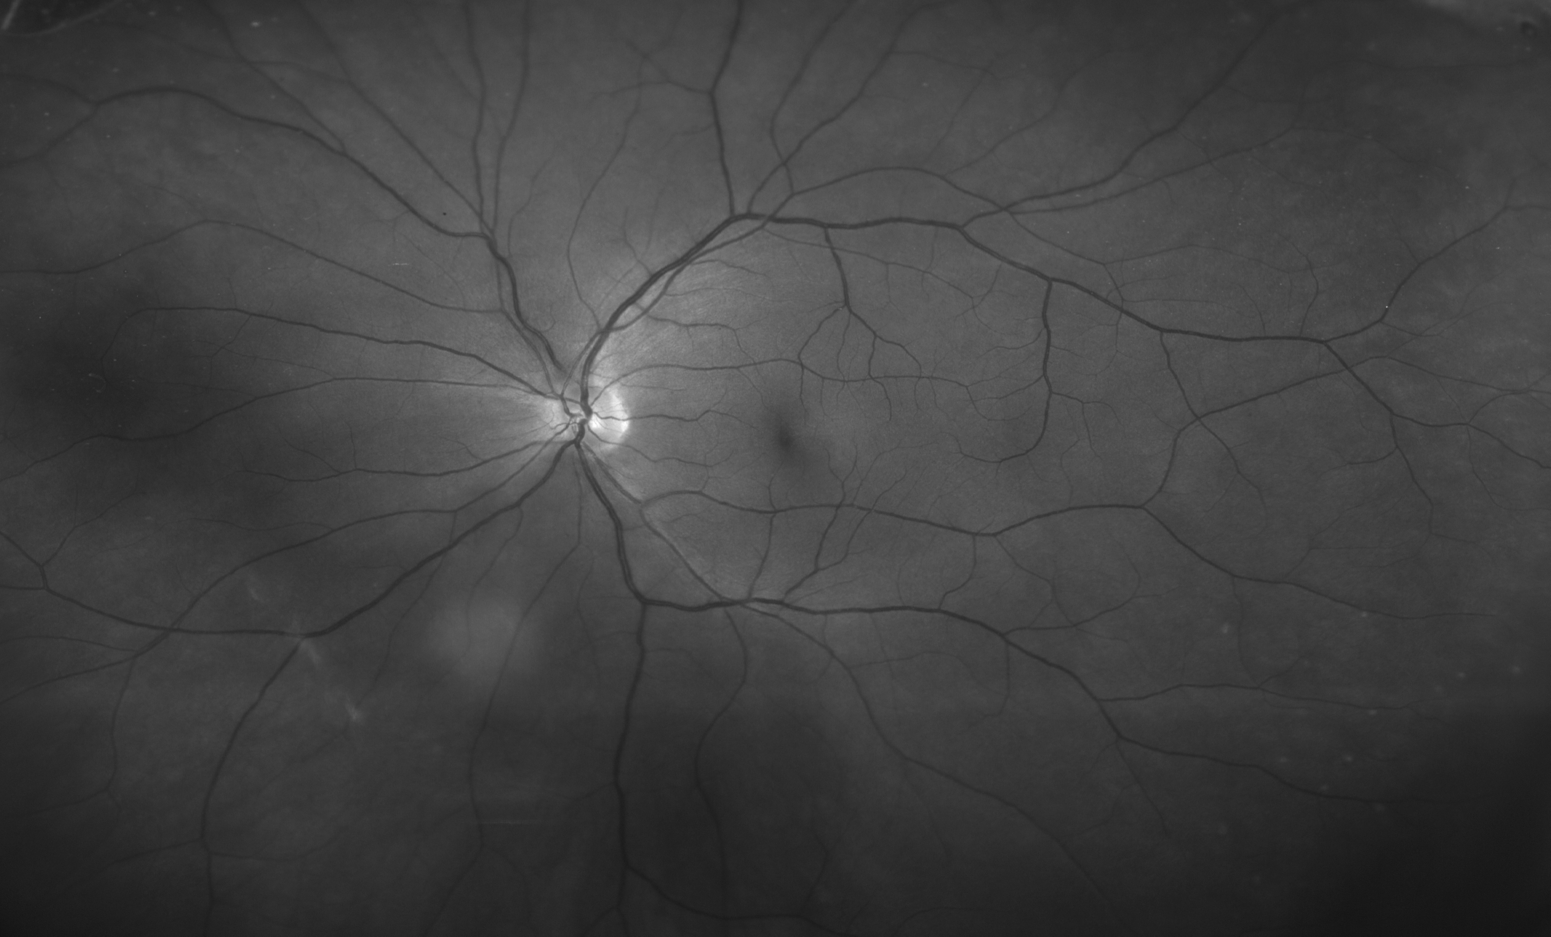

In [6]:
img.from_array(original)

In [7]:
img = Image(image_arr=original)

In [8]:
img.apply_bilateral(img.img_array)

INFO:root:Applying Bilateral filter.


In [9]:
dif_bilateral = img.get_signed_diff_int8(img.img_array ,img.img_bilateral)

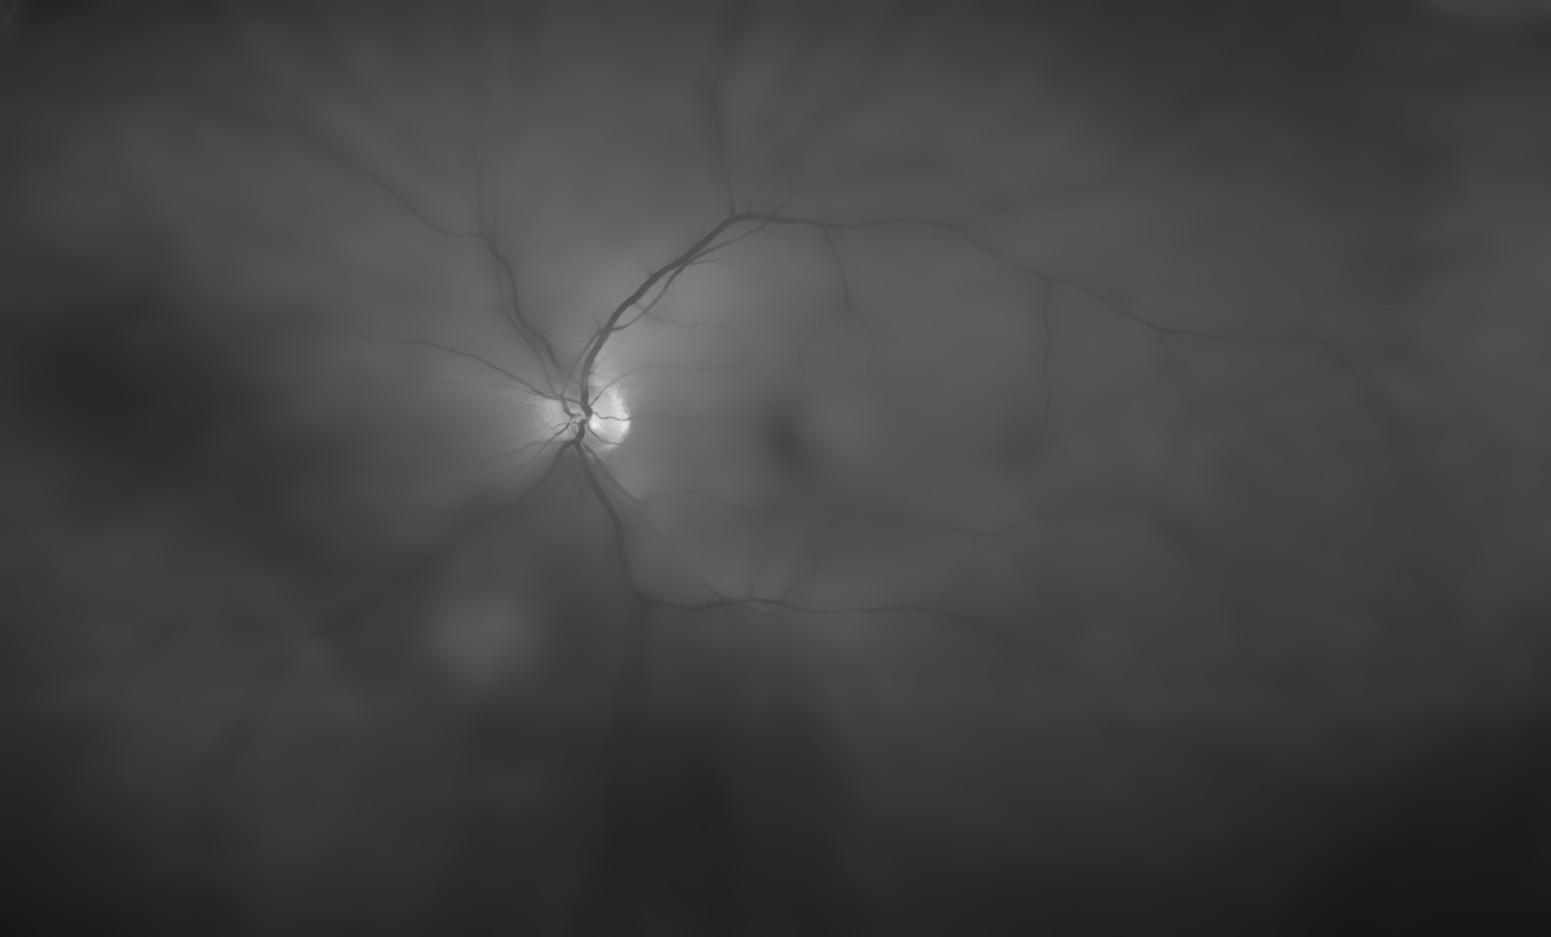

In [10]:
img.from_array(img.img_bilateral)

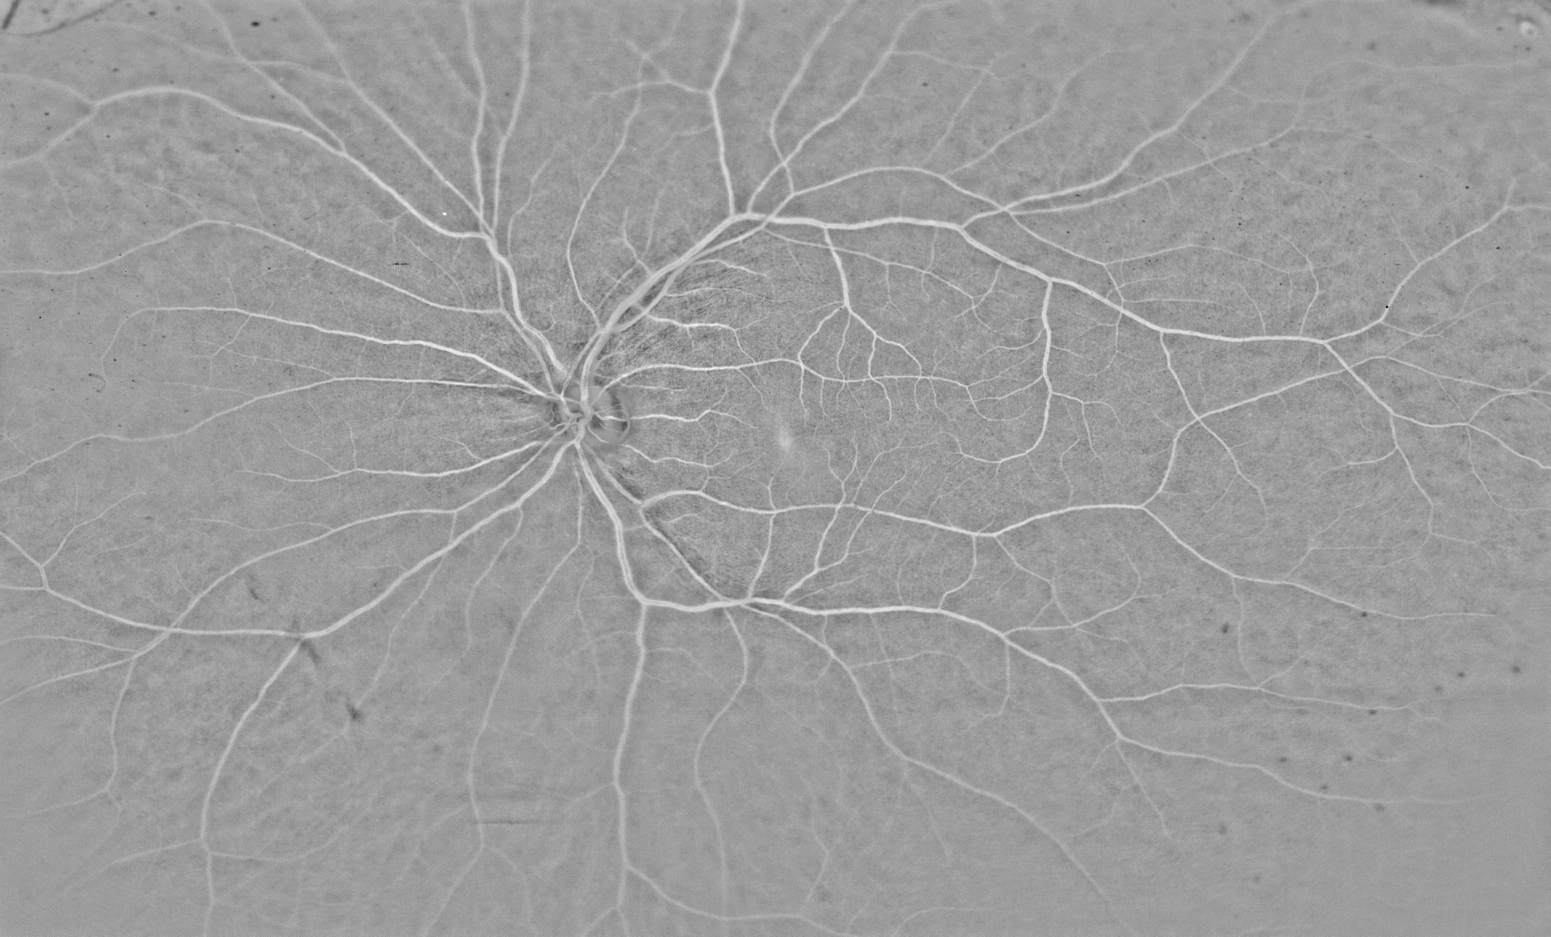

In [11]:
img.from_array(255-dif_bilateral)

In [12]:
img.apply_gabor(255-dif_bilateral,kernel_bank=fil.get_chosen_gabor_bank())
# img.from_array(255-img.img_gabor)

INFO:root:Applying Gabor filter.


In [13]:
img.create_skeleton(array_2d=img.img_gabor,kernels=fil.get_chosen_skeleton_filter())

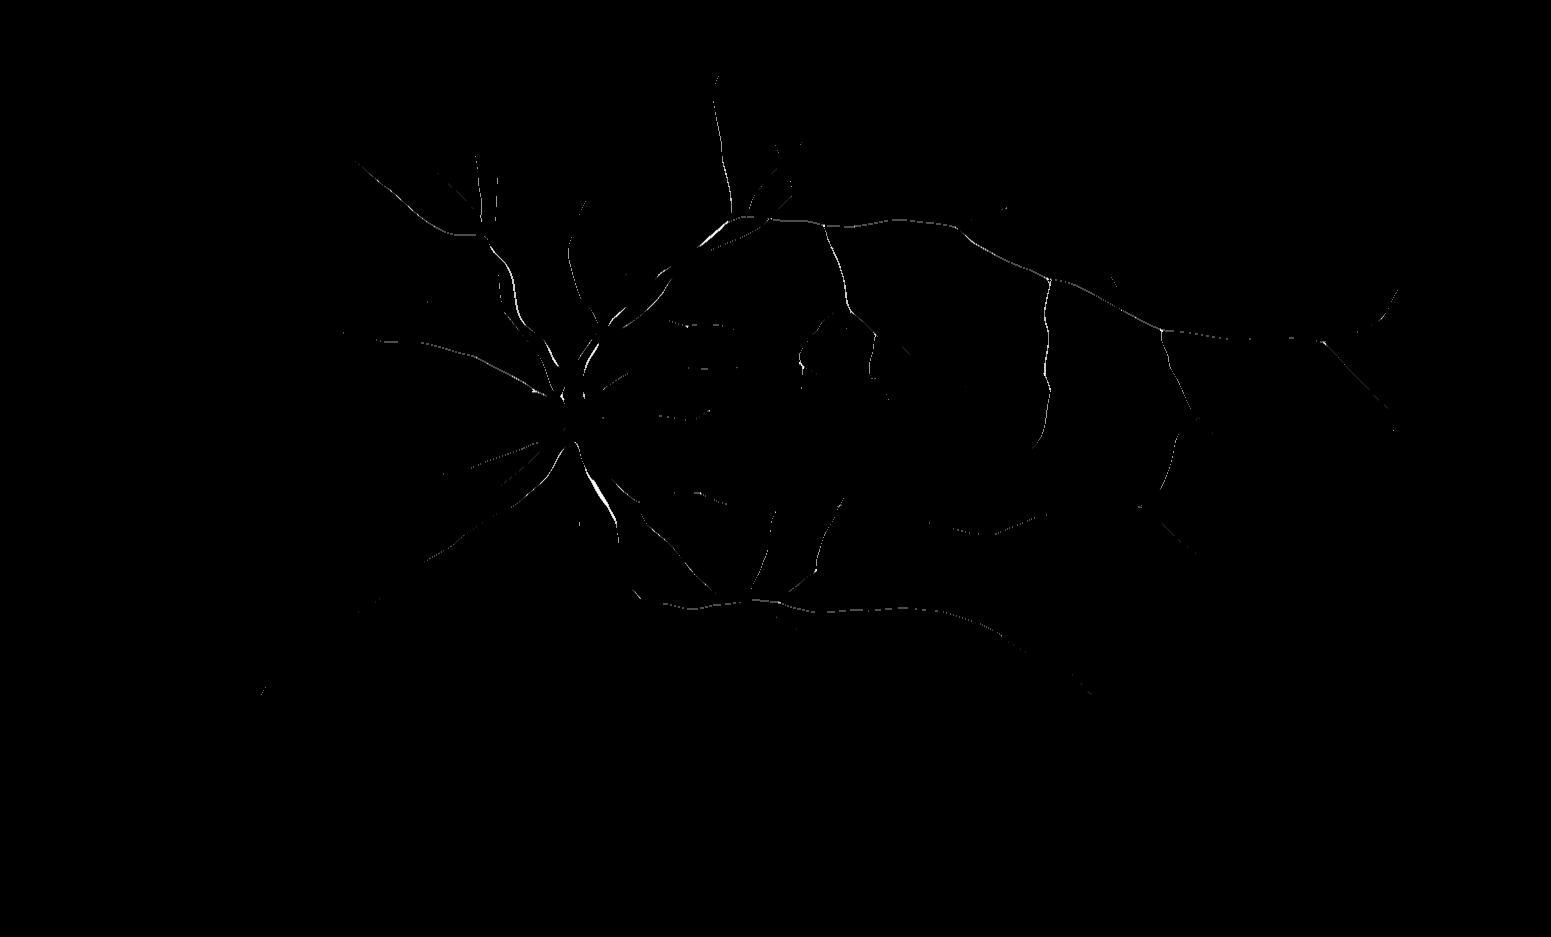

In [14]:
img.from_array(255-img.img_skeleton)

In [16]:
# img.show_kernels(fil.get_chosen_gabor_bank())

In [17]:
lattice = Lattice(image_arr_2d=img.img_gabor)

In [19]:
lattice.generate_lattice_graph(eight_connected=False)

INFO:root:Creating 4-connected lattice.


In [20]:
# lattice.chunk_lattice(lattice.lattice, (3,4))

In [21]:
# test_ix = 0
# gp = lattice.k_lattices[test_ix] 
# res = lattice.get_slice_focused(img.img_skeleton, gp)

In [25]:
images =  [(0.6, 255-img.img_gabor),(0.7, img.img_array)]

In [27]:
lattice.assign_cost(images=images,alpha=3,log=False,override=True)

In [28]:
import preprocess.algorithms.ature_mst as mst

In [29]:
seed_node_list = img.get_seed_node_list(img.img_skeleton)

In [30]:
len(seed_node_list)

154

In [27]:
mst.run_mst(lattice_object=lattice,seed=seed_node_list,node_limit_per_seed=50000, weight_limit_per_seed=100000, number_of_seeds=5)

KeyboardInterrupt: 

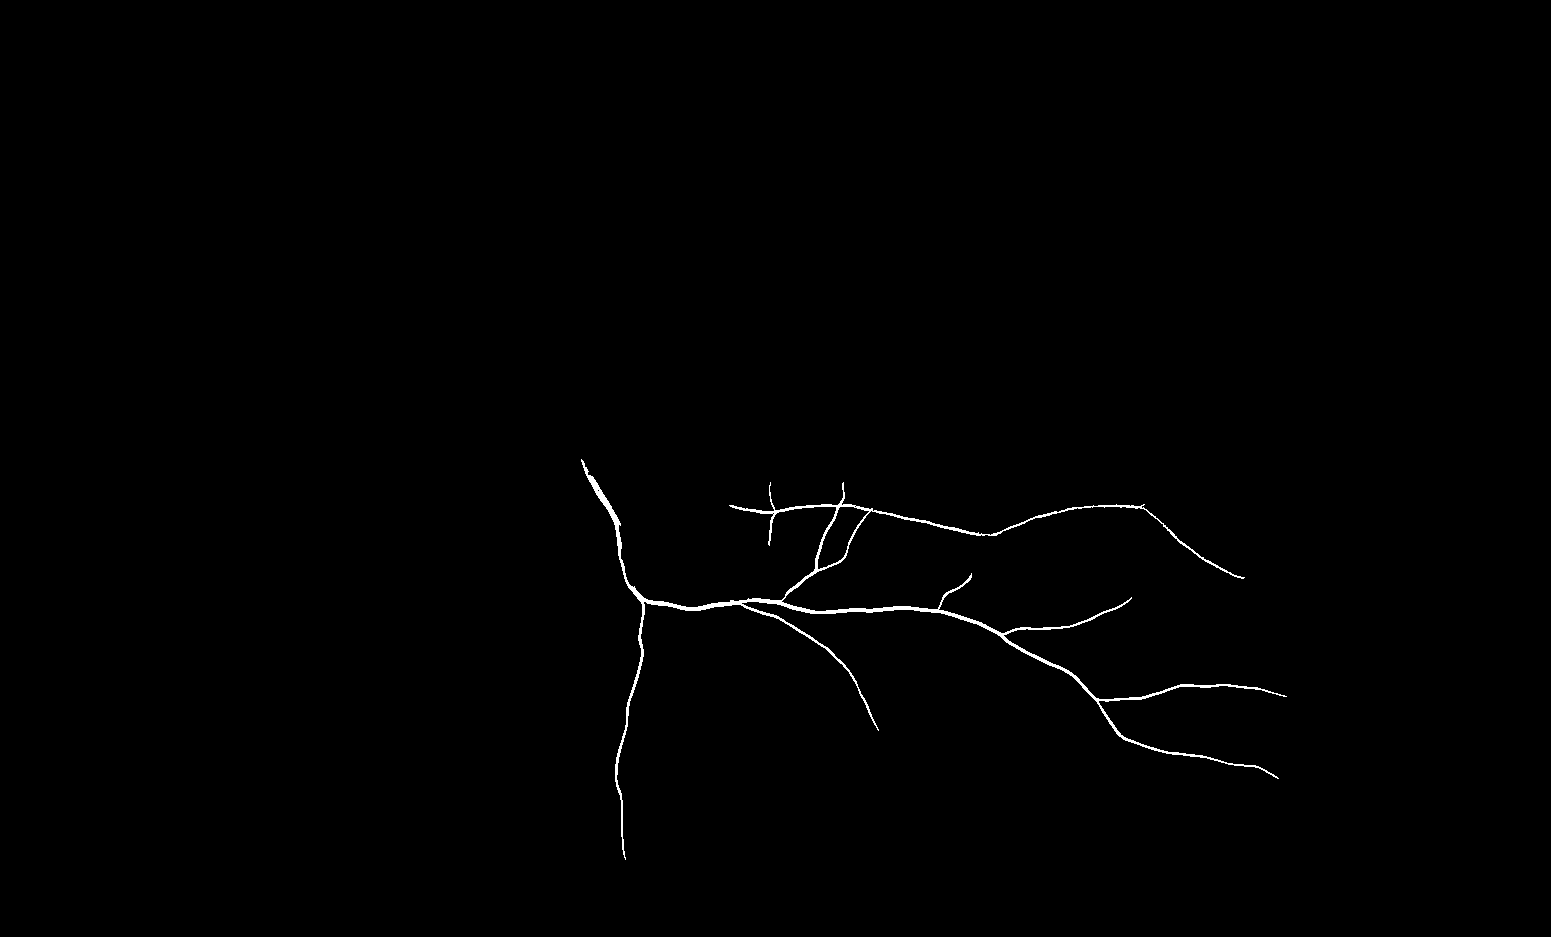

In [28]:
img.from_array(lattice.accumulator)

In [29]:
len(seed_node_list)

10874

In [27]:
lattice.total_weight

0.0

In [32]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [70]:
import networkx as nx

In [71]:
import matplotlib.pyplot as plt

In [72]:
g = nx.grid_graph([4,4])

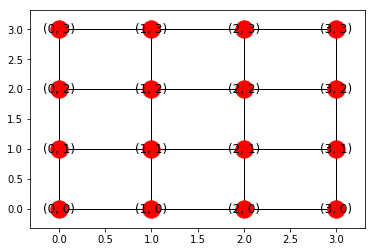

In [75]:
nx.draw_networkx(g, pos = dict(zip(g.nodes(), g.nodes())))
plt.show()

In [47]:
lattice.lattice[(100,701)]

{(99, 701): {'cost': 5.097841637362954, 'i_diff_1': 145, 'i_diff_2': 80},
 (100, 700): {'cost': 4.731158184349666, 'i_diff_1': 135, 'i_diff_2': 80},
 (100, 702): {'cost': 4.731158184349666, 'i_diff_1': 135, 'i_diff_2': 80},
 (101, 701): {'cost': 4.8010849610365725, 'i_diff_1': 137, 'i_diff_2': 80}}

In [68]:
x =img.get_signed_diff_int8((255-lattice.accumulator), original)

In [69]:
original

array([[37, 38, 38, ..., 69, 71, 71],
       [38, 36, 38, ..., 69, 71, 72],
       [37, 36, 37, ..., 67, 68, 69],
       ..., 
       [20, 21, 20, ..., 23, 24, 25],
       [19, 21, 21, ..., 23, 24, 23],
       [19, 19, 20, ..., 22, 24, 21]], dtype=uint8)

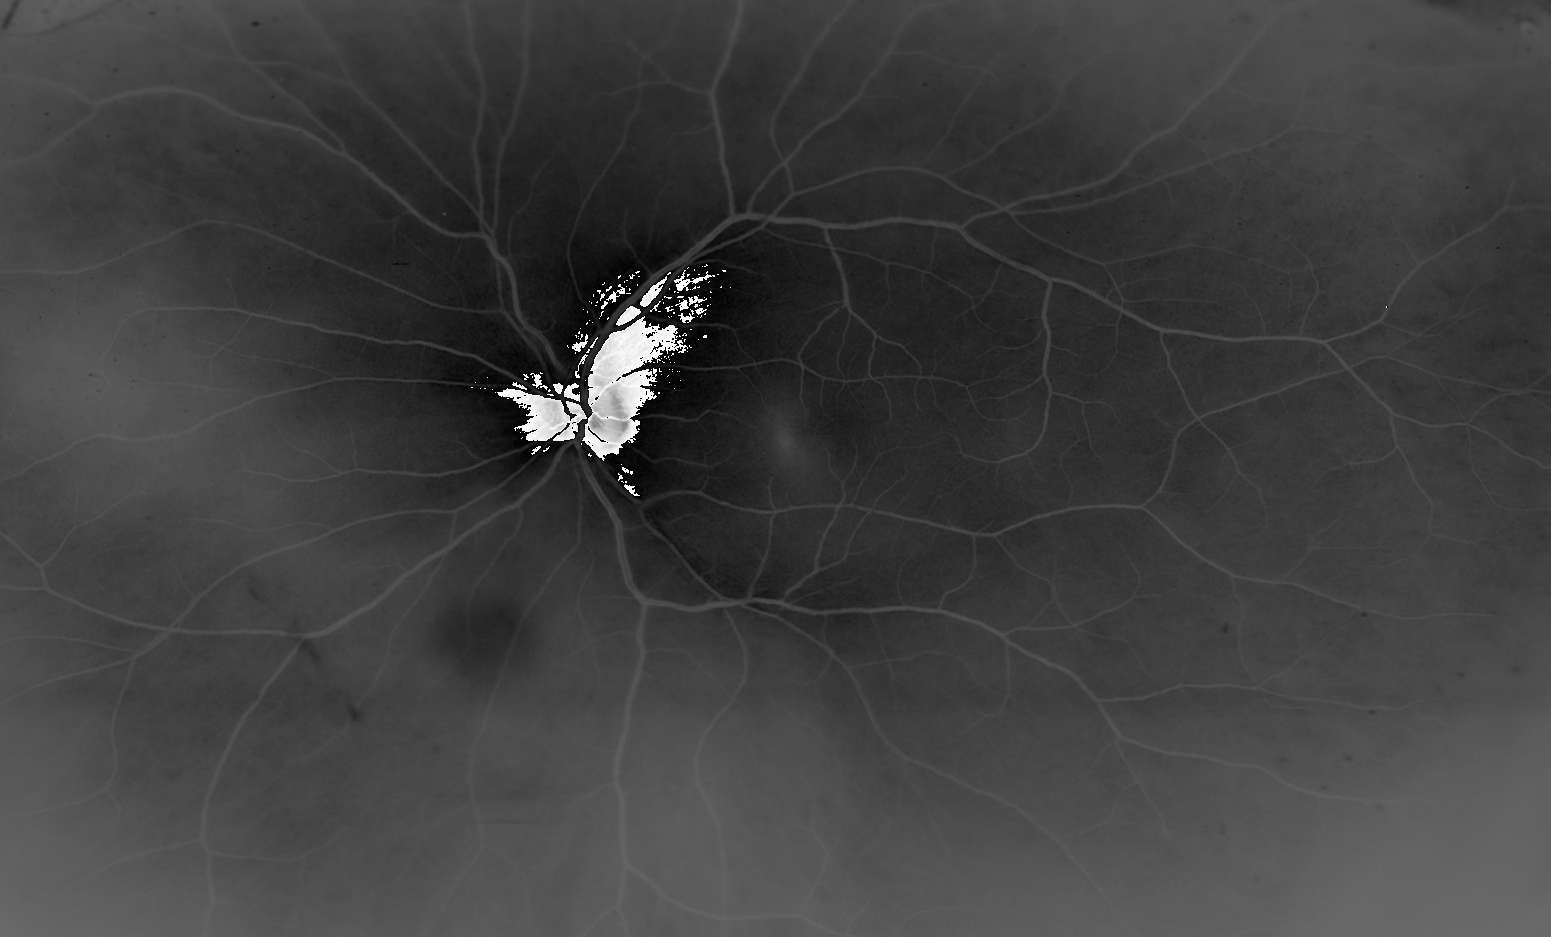

In [70]:
img.from_array(x)